# Analisis de datos

## Importe de librerias

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [108]:
# Ruta de la carpeta donde están los archivos
carpeta = "data/"
# Nombres de los archivos
archivos = ["X.csv", "Y.csv", "Z.csv"]

# Leer cada archivo y guardarlo en un dataframe con el delimitador adecuado
df_X = pd.read_csv(f"{carpeta}{archivos[0]}", sep=",", header=0)
df_Y = pd.read_csv(f"{carpeta}{archivos[1]}", sep=";", header=0)
df_Z = pd.read_csv(f"{carpeta}{archivos[2]}", sep=",", header=0)

In [109]:
print(df_X.info(),df_Y.info(),df_Z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9144 non-null   object 
 1   Price   9144 non-null   float64
dtypes: float64(1), object(1)
memory usage: 143.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4485 non-null   object
 1   Price   4485 non-null   object
dtypes: object(2)
memory usage: 70.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3565 non-null   float64
 1   Date    3565 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.8+ KB
None None None


Se puede observar que los  tipos de datos no coinciden, para la materia prima Y, los precios son de tipo objeto, mientras en los demas de tipo flotante, por otro lado las fechas deben tener formato de fecha.

In [110]:
print('MATERIA PRIMA X',df_X.describe())
print('MATERIA PRIMA Y',df_Y.describe())
print('MATERIA PRIMA Z',df_Z.describe())

MATERIA PRIMA X              Price
count  9144.000000
mean     51.323922
std      32.994964
min       9.640000
25%      19.687500
50%      45.940000
75%      75.207500
max     146.080000
MATERIA PRIMA Y              Date Price
count        4485  4485
unique       4485  1237
top     12/9/2023   470
freq            1   111
MATERIA PRIMA Z              Price
count  3565.000000
mean   2037.081197
std     372.976076
min    1421.500000
25%    1767.500000
50%    1974.750000
75%    2235.750000
max    3984.000000


No hay datos nulos ni vacios en ninguno de los 3 dataset, conviene unirlos en forma de fecha, precio x , precio y, y precio z

In [111]:
df_X.head(3)

,Date,Price
0,2024-04-04,89.18
1,2024-04-03,89.35
2,2024-04-02,88.92


In [112]:
dfX=df_X.rename(columns={"Price": "P_x"})
dfY=df_Y.rename(columns={"Price": "P_y"})
dfZ=df_Z.rename(columns={"Price": "P_z"})

In [113]:
print(dfX['Date'].unique())
print(dfY['Date'].unique())
print(dfZ['Date'].unique())

['2024-04-04' '2024-04-03' '2024-04-02' ... '1988-06-29' '1988-06-28'
 '1988-06-27']
['12/9/2023' '11/9/2023' '8/9/2023' ... '13/7/2006' '12/7/2006'
 '11/7/2006']
['2010-01-01' '2010-01-04' '2010-01-05' ... '2023-08-29' '2023-08-30'
 '2023-08-31']


en la siguiente celda se modificará el tipo de dato de la fecha de los 3 dataframe

In [114]:
dfX['Date'] = pd.to_datetime(dfX['Date'])
dfY['Date'] = pd.to_datetime(dfY['Date'], format="%d/%m/%Y")
dfZ['Date'] = pd.to_datetime(dfZ['Date'])

notece que los datos de Y estaban en otro formato

In [115]:
dfZ.head(3)

,P_z,Date
0,2225.25,2010-01-01
1,2225.25,2010-01-04
2,2246.50,2010-01-05


Ahora, los datos de los precios tambien hay que arreglarlos pues unos tienen el decimal con coma y otro con punto, comparemos el dfZ que esta arriba (decimal con punto) y el dataframe dfY (decimal con coma)

In [116]:
dfY.head()

,Date,P_y
0,2023-09-12,"547,33"
1,2023-09-11,546
2,2023-09-08,545
3,2023-09-07,550
4,2023-09-06,"552,5"


Como los valores numericos de dfY tienen el decimal con coma, se debe cambiar a punto para que sea consistente con los otros dataframes. Esto se puede hacer reemplazando la coma por un punto en la columna 'P_y'.

In [117]:
dfY["P_y"] = dfY["P_y"].str.replace(",", ".", regex=False)

In [118]:
dfY.head()

,Date,P_y
0,2023-09-12,547.33
1,2023-09-11,546
2,2023-09-08,545
3,2023-09-07,550
4,2023-09-06,552.5


In [119]:
dfY= dfY.astype({"P_y": "float64"})

In [120]:
print(dfY['Date'].dtype,dfY['P_y'].dtype)

datetime64[ns] float64


In [121]:
merge=dfX.merge(dfY, on="Date").merge(dfZ, on="Date")
merge.set_index("Date", inplace=True)

In [122]:
merge.head()

,P_x,P_y,P_z
Date,,,
2023-08-31,86.86,545.00,2165.25
2023-08-30,85.86,543.67,2140.25
2023-08-29,85.49,545.33,2116.25
2023-08-28,84.42,549.00,2116.25
2023-08-25,84.48,554.00,2123.50


No hay datos nulos ni vacios en el merge

In [123]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3530 entries, 2023-08-31 to 2010-01-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P_x     3530 non-null   float64
 1   P_y     3530 non-null   float64
 2   P_z     3530 non-null   float64
dtypes: float64(3)
memory usage: 110.3 KB


In [124]:
print(df_X.info(),df_Y.info(),df_Z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9144 non-null   object 
 1   Price   9144 non-null   float64
dtypes: float64(1), object(1)
memory usage: 143.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4485 non-null   object
 1   Price   4485 non-null   object
dtypes: object(2)
memory usage: 70.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3565 non-null   float64
 1   Date    3565 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.8+ KB
None None None


Los datos se redujeron a 3530 filas, dado que en el merge necesitamos datos de todas las materias primas en cada fecha, debido a que los datos de la materia prima Z es la mas pequeña el número de filas sera igual o menos a este, y si hay una fecha sin alguno de los valores de las materias primas en x o y esa fila será eliminada

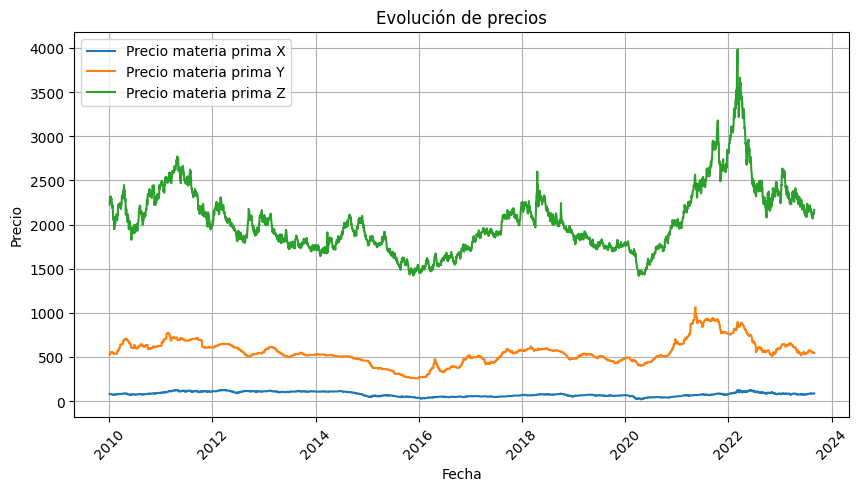

In [125]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merge, x="Date", y="P_x", label="Precio materia prima X")
sns.lineplot(data=merge, x="Date", y="P_y", label="Precio materia prima Y")
sns.lineplot(data=merge, x="Date", y="P_z", label="Precio materia prima Z")

plt.title("Evolución de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Ahora que los datos de los precios tienen el formato correcto, y estan corregidos, es posible hallar los precios de los equipos 1 y 2, teniendo en cuenta las instrucciones, el equipo 1 esta compuesto por 20% de la materia prima X y el resto (80%)por la materia prima Y, mientras que el equipo 2 se reparte en partes iguales (1/3 cada una)

In [126]:
df= pd.DataFrame({
    "Date": merge.index,
    "Equipo1": 0.2 * merge["P_x"] + 0.8 * merge["P_y"],
    "Equipo2": (merge["P_x"] + merge["P_y"] + merge["P_z"]) / 3
})
df.set_index("Date", inplace=True)
df.head(3)

,Equipo1,Equipo2
Date,,
2023-08-31,453.372,932.37
2023-08-30,452.108,923.26
2023-08-29,453.362,915.69


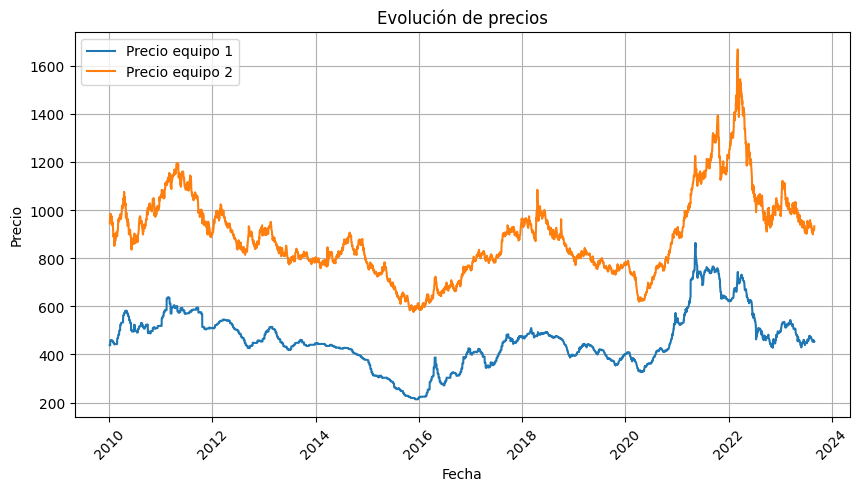

In [127]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Date", y="Equipo1", label="Precio equipo 1")
sns.lineplot(data=df, x="Date", y="Equipo2", label="Precio equipo 2")

plt.title("Evolución de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [128]:
df.describe()

,Equipo1,Equipo2
count,3530.000000,3530.000000
mean,460.039889,890.350065
std,113.352741,169.531556
min,213.222000,577.026667
25%,399.035000,780.118333
50%,449.834000,873.636667
75%,514.120000,979.438333
max,863.760000,1668.053333


In [129]:
df.head(3)

,Equipo1,Equipo2
Date,,
2023-08-31,453.372,932.37
2023-08-30,452.108,923.26
2023-08-29,453.362,915.69


### Modelo de N-Beats

Este modelo funciona refinando varias veces sobre cada franja de entrenamiento dentro de stacks que estos a su vez tienen bloques de refinamiento, cada stack refina caracteristicas distintas que al final suman sus forecast(predicciones parciales) para generar la prediccion final

In [130]:
DF=merge.copy()
DF=DF.resample("MS").mean()


Debido a que se quieren los valores de los siguientes 36 meses, se cambia la frecuancia de los datos en el mismo tiempo (meses), esto hará que se calculen los precios de forma mensual en lugar de diaria, ademas suavisa las curvas en los picos, lo que puede mejorar la .

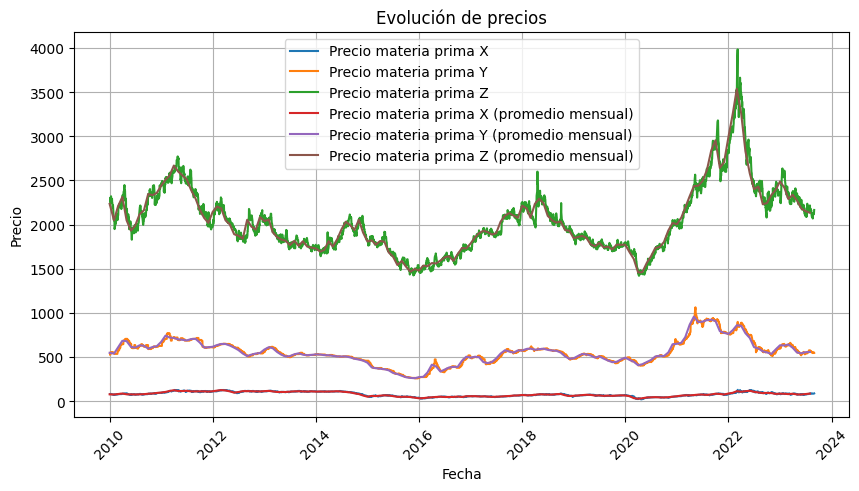

In [131]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merge, x="Date", y="P_x", label="Precio materia prima X")
sns.lineplot(data=merge, x="Date", y="P_y", label="Precio materia prima Y")
sns.lineplot(data=merge, x="Date", y="P_z", label="Precio materia prima Z")
sns.lineplot(data=DF, x=DF.index, y="P_x", label="Precio materia prima X (promedio mensual)",markers="o")
sns.lineplot(data=DF, x=DF.index, y="P_y", label="Precio materia prima Y (promedio mensual)",markers="o")
sns.lineplot(data=DF, x=DF.index, y="P_z", label="Precio materia prima Z (promedio mensual)",markers="o")

plt.title("Evolución de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [132]:
assert DF.index.is_monotonic_increasing #verificar si las fechas estan en orden creciente
assert DF[['P_x','P_y','P_z']].notnull().all().all()#nuevamente se verifica que no haya valores nulos

In [133]:
DF['Equipo_1'] = 0.2*DF['P_x'] + 0.8*DF['P_y']
DF['Equipo_2'] = (DF['P_x'] + DF['P_y'] + DF['P_z'])/3

In [134]:
DF.head(3)

,P_x,P_y,P_z,Equipo_1,Equipo_2
Date,,,,,
2010-01-01,77.013000,547.000000,2234.325000,453.002600,952.779333
2010-02-01,74.790000,538.000000,2048.575000,445.358000,887.121667
2010-03-01,79.931304,606.630435,2204.130435,501.290609,963.564058


## Prueba entrenando de a una materia prima

In [135]:
DF=merge.copy()
DF=DF.resample("MS").mean()

Como tenemos el formato ancho y utilizaremo pytorch-forecasting, este espera los datos en formato largo para identificar que serie es, por lo que se deja la fecha como una columna, una columna llamada 'serie' que se convertirá en la id del grupo, de esta forma utiliza un solo modelo para todas las serias que en este caso serian los precios de las materias primas

In [136]:
df_long = DF.reset_index().melt(id_vars="Date", 
                                   value_vars=["P_x", "P_y", "P_z"],
                                   var_name="series", 
                                   value_name="precio")

# Crear índice de tiempo entero
df_long["time_idx"] = df_long["Date"].rank(method="first").astype(int)

In [137]:
df_long.head(13)

,Date,series,precio,time_idx
0,2010-01-01,P_x,77.013000,1
1,2010-02-01,P_x,74.790000,4
2,2010-03-01,P_x,79.931304,7
3,2010-04-01,P_x,85.753810,10
4,2010-05-01,P_x,76.997619,13
5,2010-06-01,P_x,75.658636,16
6,2010-07-01,P_x,75.356364,19
7,2010-08-01,P_x,77.115000,22
8,2010-09-01,P_x,78.417273,25
9,2010-10-01,P_x,83.536190,28


In [138]:
import pandas as pd
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.data.encoders import TorchNormalizer

# df_long: columnas ["Date","series","precio","time_idx"] con time_idx = cumcount() por serie

max_encoder_length = 24
max_prediction_length = 4

datasets = {}

for materia in ["P_x", "P_y", "P_z"]:
    data_serie = (df_long[df_long.series == materia]
                  .sort_values("time_idx")
                  .copy())

    # sanity: suficientes puntos
    assert len(data_serie) >= max_encoder_length + max_prediction_length, \
        f"{materia}: pocos datos para encoder({max_encoder_length}) + pred({max_prediction_length})"

    # corte temporal recomendado por PF: último índice menos el horizonte
    validation_span = 30  # meses para ver en validación
    training_cutoff = data_serie["time_idx"].max() - validation_span

    # DATASET de entrenamiento: filtra el DF ANTES de crear el dataset
    train_dataset = TimeSeriesDataSet(
        data_serie[data_serie["time_idx"] <= training_cutoff],
        time_idx="time_idx",
        target="precio",
        group_ids=["series"],                         # un grupo (= una serie)
        min_encoder_length=max_encoder_length,
        max_encoder_length=max_encoder_length,
        max_prediction_length=max_prediction_length,
        time_varying_unknown_reals=["precio"],       # solo el target como input
        target_normalizer=TorchNormalizer(method="standard"),
        add_relative_time_idx=False,
        add_target_scales=False,
        add_encoder_length=False,
        allow_missing_timesteps=True,                # por si hay huecos
    )

    # DATASET de validación: se crea "desde" train para mantener encoders/escala
    valid_dataset = TimeSeriesDataSet.from_dataset(
        train_dataset,
        data_serie,                                  # todo el DF
        stop_randomization=True,
        min_prediction_idx=training_cutoff + 1       # arranca justo después del cutoff
    )

    datasets[materia] = (train_dataset, valid_dataset)


Ahora que tenemos los datos de entrenamiento y validacion  vamos a entrenar el modelo

In [139]:
# por si acaso: sin NaNs
data_serie = data_serie.dropna(subset=["precio"]).copy()

# asegúrate de tener suficientes puntos por serie
assert len(data_serie) >= max_encoder_length + max_prediction_length


In [140]:
dataloaders = {}
for materia, (train_dataset, valid_dataset) in datasets.items():
    # Sanity: que realmente haya ejemplos
    assert len(train_dataset) > 0, f"{materia}: train_dataset vacío"
    assert len(valid_dataset) > 0, f"{materia}: valid_dataset vacío"

    train_loader = train_dataset.to_dataloader(
        train=True, batch_size=64, num_workers=0
    )
    val_loader = valid_dataset.to_dataloader(
        train=False, batch_size=64, num_workers=0
    )
    dataloaders[materia] = (train_loader, val_loader)


ahora se entrena el modelo

In [141]:
import lightning as L
from pytorch_forecasting.models import NBeats

models = {}
L.seed_everything(42)

for materia, (train_loader, val_loader) in dataloaders.items():
    model = NBeats.from_dataset(
        datasets[materia][0],     # train_dataset
        learning_rate=1e-3,
        weight_decay=1e-4,
        widths=[256, 256],
        backcast_loss_ratio=1.0,
    )
    trainer = L.Trainer(max_epochs=50, accelerator="auto")
    trainer.fit(model, train_loader, val_loader)
    models[materia] = model


Seed set to 42
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value f

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type       | Params | Mode 
-------------------------------------------------------
0 | loss            | MASE       | 0      | train
1 | logging_metrics | ModuleList | 0      | train
2 | net_blocks      | ModuleList | 833 K  | train
-------------------------------------------------------
833 K     Trainable params
0         Non-trainable params
833 K     Total params
3.333     Total estimated model params size (MB)
86        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type       | Params | Mode 
-------------------------------------------------------
0 | loss            | MASE       | 0      | train
1 | logging_metrics | ModuleList | 0      | train
2 | net_blocks      | ModuleList | 833 K  | train
-------------------------------------------------------
833 K     Trainable params
0         Non-trainable params
833 K     Total params
3.333     Total estimated model params size (MB)
86        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


# evaluacion de parámetros

Ahora con el modelo entrenado se van a evaluar los parámetros

In [142]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error

def _mape(a, f):
    return np.mean(np.abs((a - f) / np.clip(np.abs(a), 1e-8, None))) * 100

all_metrics = []
per_horizon_metrics = []
pred_store = {}

for materia, model in models.items():
    train_loader, val_loader = dataloaders[materia]

    # Pide predicciones + índice y también X (para recuperar y_true si viene None)
    result = model.predict(
        val_loader,
        return_y=True,
        return_index=True,
        return_x=True,         # <- clave para el fallback
    )

    # Desempaqueta con seguridad (PF puede devolver lista/tupla larga)
    # order habitual: pred, index, y, x   (pero usamos slicing defensivo)
    pred = result[0]
    # Busca idx, y, x por tipo de dato
    idx = next((r for r in result if isinstance(r, pd.DataFrame)), None)
    y   = next((r for r in result if (torch.is_tensor(r) or (isinstance(r, list) and r and torch.is_tensor(r[0]))) and r is not pred), None)
    x   = next((r for r in result if isinstance(r, dict) or (isinstance(r, list) and r and isinstance(r[0], dict))), None)

    # Tensores -> concat
    if isinstance(pred, list): pred = torch.cat(pred, dim=0)
    if isinstance(y, list):    y    = torch.cat(y, dim=0)
    if isinstance(x, list):    x    = {k: torch.cat([d[k] for d in x], dim=0) for k in x[0].keys()}

    # Fallback: si y es None, recupéralo desde x["decoder_target"]
    if y is None:
        if isinstance(x, dict) and "decoder_target" in x:
            y = x["decoder_target"]
        else:
            raise RuntimeError("No se pudo recuperar y_true (ni return_y ni x['decoder_target']).")

    # A numpy
    y_pred = pred.detach().cpu().numpy()    # [N, H]
    y_true = y.detach().cpu().numpy()       # [N, H]

    # Métricas agregadas
    mae  = mean_absolute_error(y_true.ravel(), y_pred.ravel())
    rmse = mean_squared_error(y_true.ravel(), y_pred.ravel(), squared=False)
    mape = _mape(y_true.ravel(), y_pred.ravel())
    all_metrics.append({"serie": materia, "MAE": mae, "RMSE": rmse, "MAPE": mape})

    # Métricas por horizonte
    H = y_pred.shape[1]
    for h in range(H):
        mae_h  = mean_absolute_error(y_true[:, h], y_pred[:, h])
        rmse_h = mean_squared_error(y_true[:, h], y_pred[:, h], squared=False)
        mape_h = _mape(y_true[:, h], y_pred[:, h])
        per_horizon_metrics.append({"serie": materia, "h": h+1, "MAE": mae_h, "RMSE": rmse_h, "MAPE": mape_h})

    # DF largo para graficar/ensamblar serie continua
    # (idx puede llamar a la columna 'series' o 'serie', y 'time_idx' o 'time')
    series_col = "series" if "series" in idx.columns else "serie"
    time_col   = "time_idx" if "time_idx" in idx.columns else "time"

    df_eval = pd.DataFrame({
        "serie": np.repeat(idx[series_col].values, H),
        "base_time_idx": np.repeat(idx[time_col].values, H),
        "h": np.tile(np.arange(1, H+1), len(idx)),
        "y_true": y_true.ravel(),
        "y_pred": y_pred.ravel(),
    })
    pred_store[materia] = df_eval

# Tablas de métricas
df_metrics  = pd.DataFrame(all_metrics).sort_values("serie")
df_metrics_h= pd.DataFrame(per_horizon_metrics).sort_values(["serie","h"])
print("Métricas agregadas por serie:\n", df_metrics)
print("\nMétricas por horizonte (head):\n", df_metrics_h.head(12))

# df_metrics.to_csv("metrics_por_serie.csv", index=False)
# df_metrics_h.to_csv("metrics_por_horizonte.csv", index=False)
# print("-> metrics_por_serie.csv / metrics_por_horizonte.csv guardados")


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

Métricas agregadas por serie:
   serie         MAE        RMSE      MAPE
0   P_x    7.924140    9.004922  9.774773
1   P_y   29.009705   36.732410  4.984343
2   P_z  119.590576  157.738647  5.042074

Métricas por horizonte (head):
    serie  h         MAE        RMSE       MAPE
0    P_x  1    7.175948    8.120532   8.838475
1    P_x  2    8.091460    9.186582   9.973889
2    P_x  3    8.053143    9.191393   9.930342
3    P_x  4    8.376006    9.462369  10.356382
4    P_y  1   24.272575   30.181534   4.212106
5    P_y  2   26.949463   31.380466   4.654167
6    P_y  3   28.219021   32.752468   4.853318
7    P_y  4   36.597752   49.281822   6.217777
8    P_z  1   87.284859  119.472633   3.659264
9    P_z  2  105.502228  143.565735   4.428941
10   P_z  3  132.276184  170.353546   5.574168
11   P_z  4  153.299072  188.734650   6.505924


Para graficar la validacion 

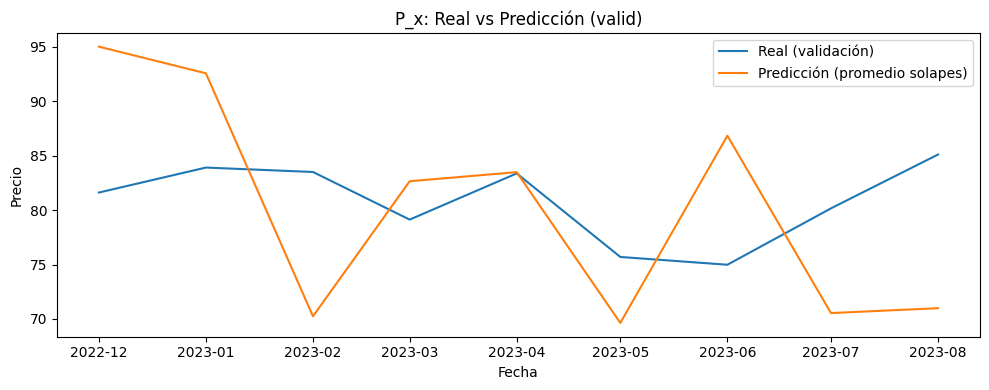

-> plotdata_P_x_valid.csv guardado


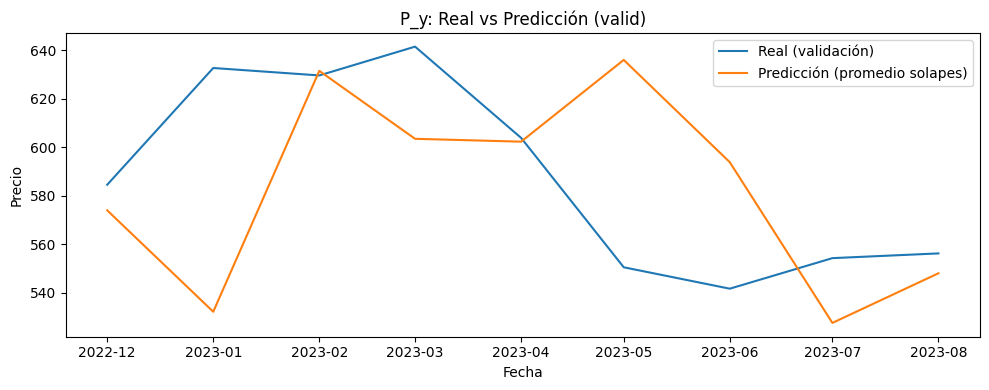

-> plotdata_P_y_valid.csv guardado


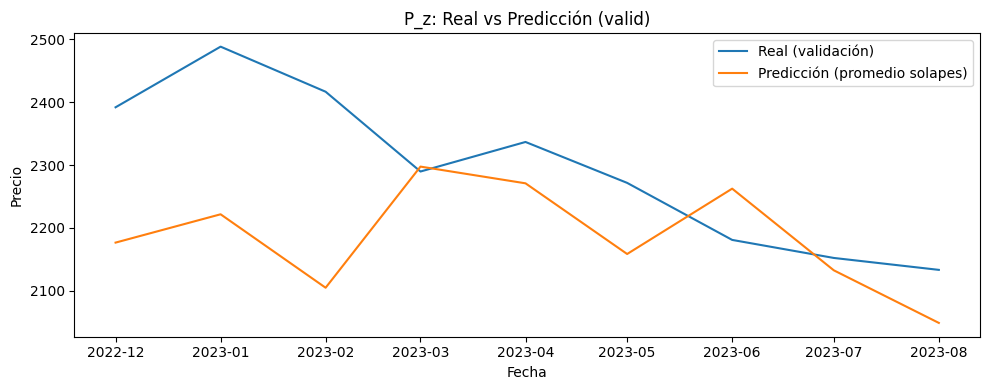

-> plotdata_P_z_valid.csv guardado


In [143]:
import matplotlib.pyplot as plt

# mapa de fechas
date_maps = {
    s: df_long[df_long["series"] == s].set_index("time_idx")["Date"].to_dict()
    for s in ["P_x","P_y","P_z"]
}

def build_continuous_forecast(df_eval, serie):
    df_eval = df_eval.copy()
    df_eval["time_idx_tgt"] = df_eval["base_time_idx"] + df_eval["h"]
    tm = date_maps[serie]
    df_eval["Date"] = df_eval["time_idx_tgt"].map(tm)
    df_eval = df_eval.dropna(subset=["Date"]).copy()
    agg = (df_eval.groupby("Date", as_index=False)[["y_true","y_pred"]]
                 .mean().sort_values("Date"))
    return agg

for materia in ["P_x","P_y","P_z"]:
    curve = build_continuous_forecast(pred_store[materia], materia)
    first_date = curve["Date"].min()
    truth = (df_long[(df_long["series"] == materia) & (df_long["Date"] >= first_date)]
             .sort_values("Date")[["Date","precio"]])

    plt.figure(figsize=(10,4))
    plt.plot(truth["Date"], truth["precio"], label="Real (validación)")
    plt.plot(curve["Date"], curve["y_pred"],   label="Predicción (promedio solapes)")
    plt.title(f"{materia}: Real vs Predicción (valid)")
    plt.xlabel("Fecha"); plt.ylabel("Precio")
    plt.legend(); plt.tight_layout()
    plt.show()

    out = truth.merge(curve, on="Date", how="outer").sort_values("Date")
    #out.to_csv(f"plotdata_{materia}_valid.csv", index=False)
    print(f"-> plotdata_{materia}_valid.csv guardado")


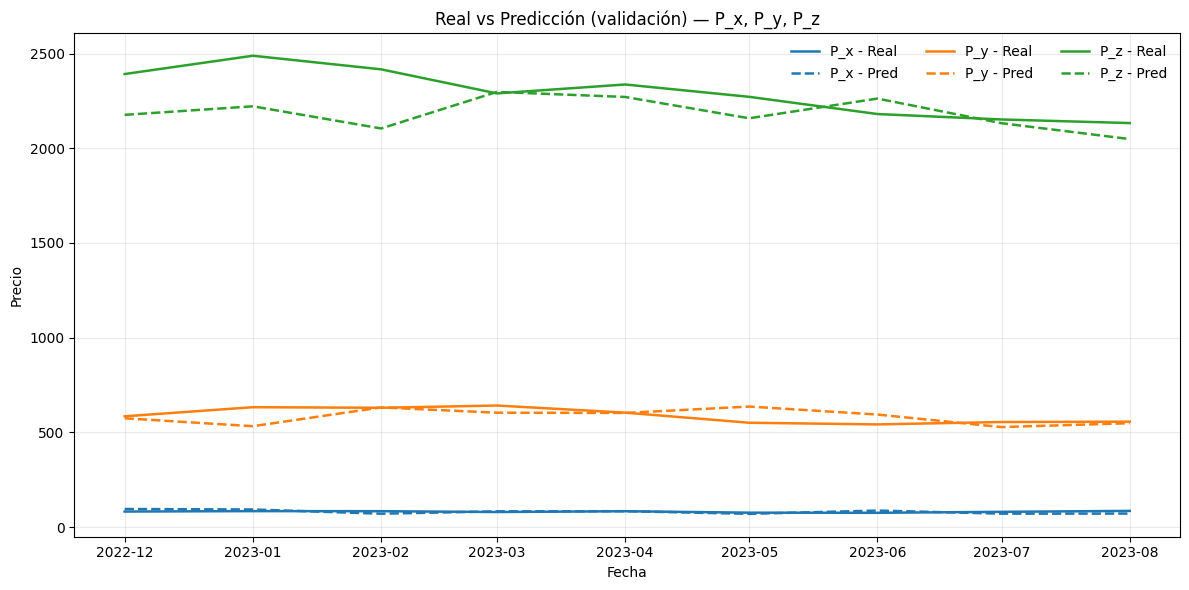

In [144]:

# --- helpers que ya usamos antes ---
date_maps = {
    s: df_long[df_long["series"] == s].set_index("time_idx")["Date"].to_dict()
    for s in ["P_x","P_y","P_z"]
}

def build_continuous_forecast(df_eval, serie):
    df_eval = df_eval.copy()
    df_eval["time_idx_tgt"] = df_eval["base_time_idx"] + df_eval["h"]
    tm = date_maps[serie]
    df_eval["Date"] = df_eval["time_idx_tgt"].map(tm)
    df_eval = df_eval.dropna(subset=["Date"]).copy()
    agg = (df_eval.groupby("Date", as_index=False)[["y_true","y_pred"]]
                 .mean().sort_values("Date"))
    return agg

# --- construye curvas continuo (validación) para cada serie ---
curves = {}
truths = {}
for materia in ["P_x","P_y","P_z"]:
    curve = build_continuous_forecast(pred_store[materia], materia)
    first_date = curve["Date"].min()
    truth = (df_long[(df_long["series"] == materia) & (df_long["Date"] >= first_date)]
             .sort_values("Date")[["Date","precio"]])
    curves[materia] = curve
    truths[materia] = truth

# --- ploteo en UNA figura ---
plt.figure(figsize=(12,6))

colors = {"P_x":"C0", "P_y":"C1", "P_z":"C2"}  # paleta por serie

for materia in ["P_x","P_y","P_z"]:
    # Real (validación)
    plt.plot(
        truths[materia]["Date"], truths[materia]["precio"],
        label=f"{materia} - Real", linewidth=1.8, color=colors[materia]
    )
    # Predicción (promedio de solapes)
    plt.plot(
        curves[materia]["Date"], curves[materia]["y_pred"],
        label=f"{materia} - Pred", linewidth=1.8, linestyle="--", color=colors[materia]
    )

plt.title("Real vs Predicción (validación) — P_x, P_y, P_z")
plt.xlabel("Fecha"); plt.ylabel("Precio")
plt.legend(ncol=3, frameon=False)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


ahora graficando la historia completa

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

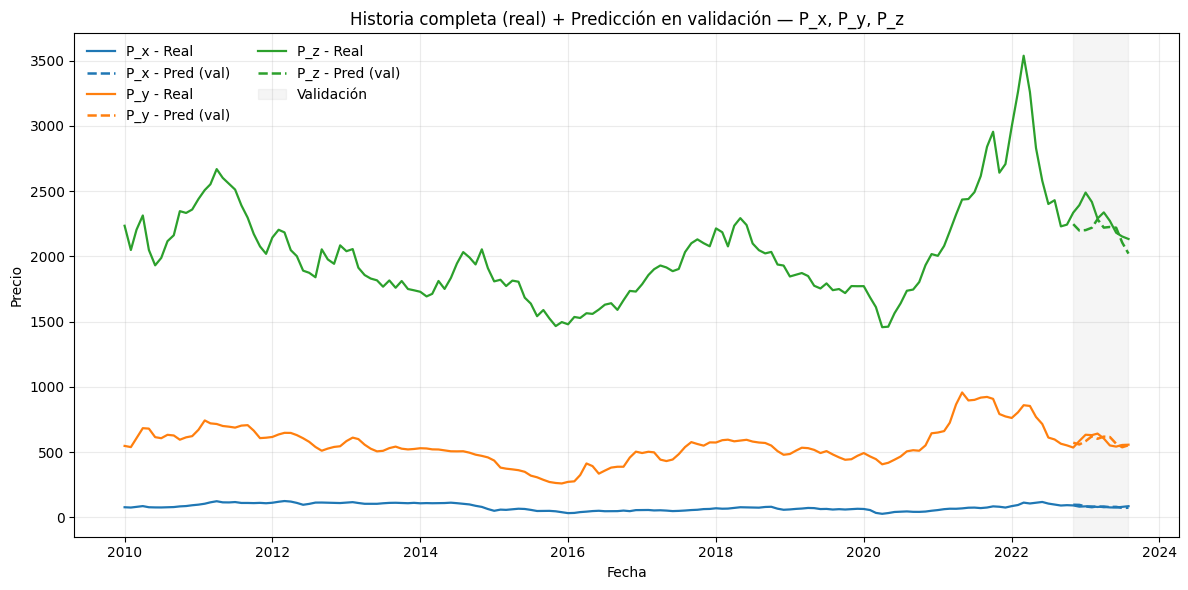

In [145]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# 1) mapa time_idx -> fecha por serie
date_maps = {
    s: df_long[df_long["series"] == s].set_index("time_idx")["Date"].to_dict()
    for s in ["P_x","P_y","P_z"]
}

# 2) curva de predicción alineada con fechas usando decoder_time_idx (válido para val_loader)
def curve_from_loader(model, loader, serie):
    result = model.predict(loader, return_index=True, return_y=True, return_x=True)

    pred = result[0]
    idx  = next(r for r in result if isinstance(r, pd.DataFrame))
    x    = next(r for r in result if isinstance(r, dict) or (isinstance(r, list) and r and isinstance(r[0], dict)))
    y    = next((r for r in result if (torch.is_tensor(r) or (isinstance(r, list) and r and torch.is_tensor(r[0]))) and r is not pred), None)

    if isinstance(pred, list): pred = torch.cat(pred, dim=0)
    if isinstance(y, list):    y    = torch.cat(y, dim=0)
    if isinstance(x, list):    x    = {k: torch.cat([d[k] for d in x], dim=0) for k in x[0].keys()}
    if y is None: y = x["decoder_target"]

    t_dec  = x["decoder_time_idx"].detach().cpu().numpy().astype(int).ravel()
    dates  = np.array([date_maps[serie].get(ti, np.datetime64("NaT")) for ti in t_dec])
    y_pred = pred.detach().cpu().numpy().ravel()

    df_curve = pd.DataFrame({"Date": dates, "y_pred": y_pred}).dropna()
    return df_curve.groupby("Date", as_index=False)["y_pred"].mean().sort_values("Date")

# 3) curvas de validación + verdad completa
curves = {}
truth_all = {}
vmins, vmaxs = [], []
for s in ["P_x","P_y","P_z"]:
    _, val_loader = dataloaders[s]
    curves[s] = curve_from_loader(models[s], val_loader, s)     # pred en validación
    truth_all[s] = (df_long[df_long["series"] == s]
                    .sort_values("Date")[["Date","precio"]])    # toda la historia
    vmins.append(curves[s]["Date"].min()); vmaxs.append(curves[s]["Date"].max())

v_start, v_end = min(vmins), max(vmaxs)  # rango de validación (para sombrear)

# 4) ploteo: historia completa + pred sobre el tramo donde existe
plt.figure(figsize=(12,6))
colors = {"P_x":"C0","P_y":"C1","P_z":"C2"}

for s in ["P_x","P_y","P_z"]:
    # Real: TODA la historia
    plt.plot(truth_all[s]["Date"], truth_all[s]["precio"], color=colors[s], lw=1.6, label=f"{s} - Real")
    # Pred: sólo donde tenemos predicciones (validación)
    plt.plot(curves[s]["Date"], curves[s]["y_pred"], color=colors[s], lw=1.8, ls="--", label=f"{s} - Pred (val)")

# sombrear período de validación
plt.axvspan(v_start, v_end, color="grey", alpha=0.08, label="Validación")

plt.title("Historia completa (real) + Predicción en validación — P_x, P_y, P_z")
plt.xlabel("Fecha"); plt.ylabel("Precio")
plt.grid(alpha=0.25); plt.legend(ncol=2, frameon=False)
plt.tight_layout(); plt.show()


# proyeccion del proyecto

In [146]:
# Predicción de los próximos 36 meses
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Configuración para predicción futura
future_months = 36
prediction_length = 4  # horizonte del modelo

# Obtener la última fecha de los datos
last_date = df_long['Date'].max()
print(f"Última fecha en los datos: {last_date}")

# Crear fechas futuras (próximos 36 meses)
future_dates = []
current_date = last_date
for i in range(future_months):
    current_date = current_date + relativedelta(months=1)
    future_dates.append(current_date)

print(f"Prediciendo desde {future_dates[0]} hasta {future_dates[-1]}")

# Diccionario para almacenar todas las predicciones
all_predictions = {materia: [] for materia in ["P_x", "P_y", "P_z"]}
prediction_dates = []

# Función para hacer predicciones iterativas
def predict_next_batch(model, last_data, serie_name, prediction_length):
    """
    Predice el siguiente lote usando los últimos datos disponibles
    """
    # Crear dataset temporal para la predicción
    temp_data = last_data.copy()
    
    # Crear el dataset de predicción
    pred_dataset = TimeSeriesDataSet.from_dataset(
        datasets[serie_name][0],  # usar el dataset de entrenamiento como base
        temp_data,
        stop_randomization=True,
        predict=True
    )
    
    # Crear dataloader
    pred_loader = pred_dataset.to_dataloader(
        train=False, batch_size=1, num_workers=0
    )
    
    # Hacer predicción
    predictions = models[serie_name].predict(pred_loader)
    
    if isinstance(predictions, list):
        predictions = torch.cat(predictions, dim=0)
    
    return predictions.detach().cpu().numpy().flatten()

# Realizar predicciones iterativas para cada materia prima
for materia in ["P_x", "P_y", "P_z"]:
    print(f"\nPrediciendo {materia}...")
    
    # Obtener los datos históricos de esta serie
    serie_data = df_long[df_long["series"] == materia].copy().sort_values("time_idx")
    
    # Preparar datos para predicción iterativa
    current_data = serie_data.copy()
    predictions_for_serie = []
    
    # Calcular cuántos lotes de predicción necesitamos
    num_batches = (future_months + prediction_length - 1) // prediction_length
    
    for batch in range(num_batches):
        print(f"  Lote {batch + 1}/{num_batches}")
        
        # Hacer predicción del siguiente lote
        batch_predictions = predict_next_batch(
            models[materia], 
            current_data, 
            materia, 
            prediction_length
        )
        
        # Agregar las predicciones necesarias
        start_idx = batch * prediction_length
        end_idx = min(start_idx + prediction_length, future_months)
        needed_predictions = end_idx - start_idx
        
        predictions_for_serie.extend(batch_predictions[:needed_predictions])
        
        # Actualizar los datos con las nuevas predicciones para el siguiente lote
        if batch < num_batches - 1:  # No actualizar en el último lote
            # Crear nuevas filas con las predicciones
            new_rows = []
            for i in range(prediction_length):
                if start_idx + i < future_months:
                    new_time_idx = current_data["time_idx"].max() + i + 1
                    new_date = future_dates[start_idx + i]
                    
                    new_row = {
                        "Date": new_date,
                        "series": materia,
                        "precio": batch_predictions[i],
                        "time_idx": new_time_idx
                    }
                    new_rows.append(new_row)
            
            # Agregar las nuevas filas al dataset
            new_df = pd.DataFrame(new_rows)
            current_data = pd.concat([current_data, new_df], ignore_index=True)
            
            # Mantener solo los últimos datos necesarios para la predicción
            max_length_needed = max_encoder_length + prediction_length
            if len(current_data) > max_length_needed:
                current_data = current_data.tail(max_length_needed).copy()
                # Reajustar time_idx para que sea consecutivo
                current_data["time_idx"] = range(1, len(current_data) + 1)
    
    # Guardar las predicciones para esta serie
    all_predictions[materia] = predictions_for_serie[:future_months]

# Crear DataFrame con todas las predicciones
predictions_df = pd.DataFrame({
    "Date": future_dates,
    "P_x_pred": all_predictions["P_x"],
    "P_y_pred": all_predictions["P_y"], 
    "P_z_pred": all_predictions["P_z"]
})

# Calcular precios de equipos con las predicciones
predictions_df["Equipo1_pred"] = 0.2 * predictions_df["P_x_pred"] + 0.8 * predictions_df["P_y_pred"]
predictions_df["Equipo2_pred"] = (predictions_df["P_x_pred"] + predictions_df["P_y_pred"] + predictions_df["P_z_pred"]) / 3

print(f"\nPredicciones completadas para {len(predictions_df)} meses")
print("\nPrimeras 5 predicciones:")
print(predictions_df.head())
print("\nÚltimas 5 predicciones:")
print(predictions_df.tail())

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

Última fecha en los datos: 2023-08-01 00:00:00
Prediciendo desde 2023-09-01 00:00:00 hasta 2026-08-01 00:00:00

Prediciendo P_x...
  Lote 1/9
  Lote 2/9


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_

  Lote 3/9
  Lote 4/9


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of th

  Lote 5/9
  Lote 6/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 

  Lote 7/9
  Lote 8/9


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

  Lote 9/9

Prediciendo P_y...
  Lote 1/9


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 

  Lote 2/9
  Lote 3/9


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

  Lote 4/9
  Lote 5/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 

  Lote 6/9
  Lote 7/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  Lote 8/9
  Lote 9/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 


Prediciendo P_z...
  Lote 1/9
  Lote 2/9


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 

  Lote 3/9
  Lote 4/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have 

  Lote 5/9
  Lote 6/9


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of th

  Lote 7/9
  Lote 8/9


c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


  Lote 9/9

Predicciones completadas para 36 meses

Primeras 5 predicciones:
        Date   P_x_pred    P_y_pred     P_z_pred  Equipo1_pred  Equipo2_pred
0 2023-09-01  72.837936  544.151245  2108.866699    449.888611    908.618652
1 2023-10-01  70.775818  542.709961  2077.608643    448.323120    897.031494
2 2023-11-01  70.986557  548.122681  2048.540527    452.695435    889.216614
3 2023-12-01  73.141441  552.131287  2020.837158    456.333344    882.036621
4 2024-01-01  84.591141  544.493652  2172.843750    452.513184    933.976135

Últimas 5 predicciones:
         Date   P_x_pred    P_y_pred     P_z_pred  Equipo1_pred  Equipo2_pred
31 2026-04-01  79.110672  510.951569  1941.760010    424.583405    843.940735
32 2026-05-01  28.957787  677.026062  1886.192505    547.412415    864.058777
33 2026-06-01  21.630384  696.026428  1864.322754    561.147217    860.659851
34 2026-07-01  21.643257  696.948364  1845.540894    561.887390    854.710876
35 2026-08-01  28.154646  680.648987  1838.491

c:\Users\pinto\OneDrive\Documentos\DK\Prueba Técnica Cientifico de Datos\Prueba1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Columnas históricas disponibles: ['Date', 'P_x', 'P_y', 'P_z', 'Equipo_1', 'Equipo_2']
Columnas predicción disponibles: ['Date', 'P_x_pred', 'P_y_pred', 'P_z_pred', 'Equipo1_pred', 'Equipo2_pred']


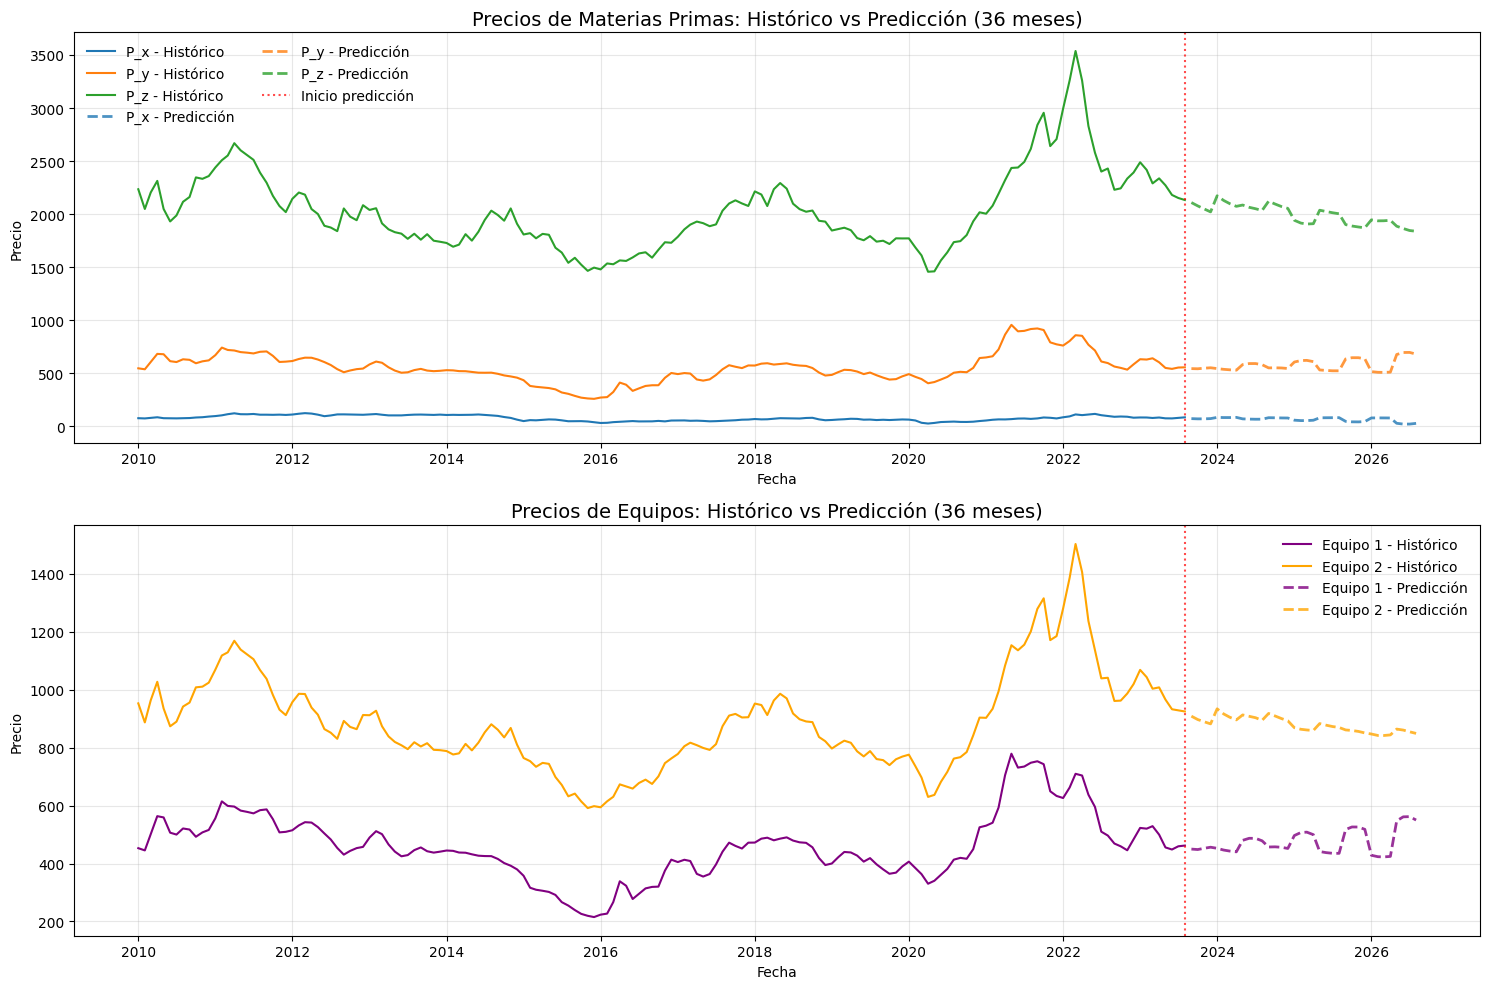


RESUMEN DE PREDICCIONES PARA LOS PRÓXIMOS 36 MESES

Materias Primas:
P_x_pred    : Promedio=65.64, Std=19.25, Min=21.63, Max=84.69
P_y_pred    : Promedio=577.83, Std=56.94, Min=508.70, Max=696.95
P_z_pred    : Promedio=1994.27, Std=93.64, Min=1838.49, Max=2172.84

Equipos:
Equipo1_pred   : Promedio=475.39, Std=41.84, Min=422.87, Max=561.89
Equipo2_pred   : Promedio=879.25, Std=25.57, Min=841.90, Max=933.98

✅ Predicciones guardadas en 'predicciones_36_meses.csv'

Transición histórico → predicción:
Última fecha histórica: 2023-08-01
Primera fecha predicción: 2023-09-01
Última fecha predicción: 2026-08-01


In [147]:
# Visualización de las predicciones junto con los datos históricos
import matplotlib.pyplot as plt

# Preparar datos históricos para graficar
historical_data = DF.reset_index()  # DF contiene los datos mensuales históricos
# Asegurar que Date es datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# Helper para localizar columnas con nombres alternativos
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# Buscar nombres posibles para columnas de equipos
eq1_col = find_col(historical_data, ['Equipo_1', 'Equipo1', 'Equipo 1'])
eq2_col = find_col(historical_data, ['Equipo_2', 'Equipo2', 'Equipo 2'])

# Si faltan, calcular a partir de las materias primas si es posible
if eq1_col is None:
    if set(['P_x', 'P_y']).issubset(historical_data.columns):
        historical_data['Equipo_1'] = 0.2 * historical_data['P_x'] + 0.8 * historical_data['P_y']
        eq1_col = 'Equipo_1'
    else:
        # dejar la columna faltante como NaN para no romper el plotting; se informará
        historical_data['Equipo_1'] = np.nan
        eq1_col = 'Equipo_1'

if eq2_col is None:
    if set(['P_x', 'P_y', 'P_z']).issubset(historical_data.columns):
        historical_data['Equipo_2'] = (historical_data['P_x'] + historical_data['P_y'] + historical_data['P_z']) / 3
        eq2_col = 'Equipo_2'
    else:
        historical_data['Equipo_2'] = np.nan
        eq2_col = 'Equipo_2'

# Asegurar columnas de predicción de equipos en predictions_df (calcular si faltan)
if 'Equipo1_pred' not in predictions_df.columns:
    if set(['P_x_pred', 'P_y_pred']).issubset(predictions_df.columns):
        predictions_df['Equipo1_pred'] = 0.2 * predictions_df['P_x_pred'] + 0.8 * predictions_df['P_y_pred']

if 'Equipo2_pred' not in predictions_df.columns:
    if set(['P_x_pred', 'P_y_pred', 'P_z_pred']).issubset(predictions_df.columns):
        predictions_df['Equipo2_pred'] = (predictions_df['P_x_pred'] + predictions_df['P_y_pred'] + predictions_df['P_z_pred']) / 3

# Asegurar tipos de fecha en predictions_df
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])

print(f"Columnas históricas disponibles: {list(historical_data.columns)}")
print(f"Columnas predicción disponibles: {list(predictions_df.columns)}")

plt.figure(figsize=(15, 10))

# Preparar comprobaciones para materias primas históricas
has_px = 'P_x' in historical_data.columns
has_py = 'P_y' in historical_data.columns
has_pz = 'P_z' in historical_data.columns

# Subplot 1: Materias primas
plt.subplot(2, 1, 1)

# Datos históricos (solo si existen)
if has_px:
    plt.plot(historical_data['Date'], historical_data['P_x'], label='P_x - Histórico', color='C0', linewidth=1.5)
if has_py:
    plt.plot(historical_data['Date'], historical_data['P_y'], label='P_y - Histórico', color='C1', linewidth=1.5)
if has_pz:
    plt.plot(historical_data['Date'], historical_data['P_z'], label='P_z - Histórico', color='C2', linewidth=1.5)

# Predicciones (si existen)
if 'P_x_pred' in predictions_df.columns:
    plt.plot(predictions_df['Date'], predictions_df['P_x_pred'], label='P_x - Predicción', color='C0', linewidth=2, linestyle='--', alpha=0.8)
if 'P_y_pred' in predictions_df.columns:
    plt.plot(predictions_df['Date'], predictions_df['P_y_pred'], label='P_y - Predicción', color='C1', linewidth=2, linestyle='--', alpha=0.8)
if 'P_z_pred' in predictions_df.columns:
    plt.plot(predictions_df['Date'], predictions_df['P_z_pred'], label='P_z - Predicción', color='C2', linewidth=2, linestyle='--', alpha=0.8)

# Línea vertical para separar histórico de predicción (si existe una fecha histórica válida)
if not historical_data['Date'].isnull().all():
    plt.axvline(x=historical_data['Date'].iloc[-1], color='red', linestyle=':', alpha=0.7, label='Inicio predicción')

plt.title('Precios de Materias Primas: Histórico vs Predicción (36 meses)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(ncol=2, frameon=False)
plt.grid(True, alpha=0.3)

# Subplot 2: Equipos
plt.subplot(2, 1, 2)

# Datos históricos de equipos (si no existen, se generaron arriba como columnas calculadas o NaN)
plt.plot(historical_data['Date'], historical_data[eq1_col], label='Equipo 1 - Histórico', color='purple', linewidth=1.5)
plt.plot(historical_data['Date'], historical_data[eq2_col], label='Equipo 2 - Histórico', color='orange', linewidth=1.5)

# Predicciones de equipos

plt.plot(predictions_df['Date'], predictions_df['Equipo1_pred'], label='Equipo 1 - Predicción', color='purple', linewidth=2, linestyle='--', alpha=0.8)


plt.plot(predictions_df['Date'], predictions_df['Equipo2_pred'], label='Equipo 2 - Predicción', color='orange', linewidth=2, linestyle='--', alpha=0.8)

# Línea vertical para separar histórico de predicción
if not historical_data['Date'].isnull().all():
    plt.axvline(x=historical_data['Date'].iloc[-1], color='red', linestyle=':', alpha=0.7)

plt.title('Precios de Equipos: Histórico vs Predicción (36 meses)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(frameon=False)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas de las predicciones
print('\n' + '='*60)
print('RESUMEN DE PREDICCIONES PARA LOS PRÓXIMOS 36 MESES')
print('='*60)

print('\nMaterias Primas:')
for col in [c for c in ['P_x_pred', 'P_y_pred', 'P_z_pred'] if c in predictions_df.columns]:
    mean_pred = predictions_df[col].mean()
    std_pred = predictions_df[col].std()
    min_pred = predictions_df[col].min()
    max_pred = predictions_df[col].max()
    print(f"{col:12}: Promedio={mean_pred:.2f}, Std={std_pred:.2f}, Min={min_pred:.2f}, Max={max_pred:.2f}")

print('\nEquipos:')
for col in [c for c in ['Equipo1_pred', 'Equipo2_pred'] if c in predictions_df.columns]:
    mean_pred = predictions_df[col].mean()
    std_pred = predictions_df[col].std()
    min_pred = predictions_df[col].min()
    max_pred = predictions_df[col].max()
    print(f"{col:15}: Promedio={mean_pred:.2f}, Std={std_pred:.2f}, Min={min_pred:.2f}, Max={max_pred:.2f}")

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('predicciones_36_meses.csv', index=False)
print(f"\n✅ Predicciones guardadas en 'predicciones_36_meses.csv'")

# Mostrar las últimas fechas históricas y las primeras predicciones
print(f"\nTransición histórico → predicción:")
if not historical_data['Date'].isnull().all():
    print(f"Última fecha histórica: {historical_data['Date'].iloc[-1].strftime('%Y-%m-%d')}")
if len(predictions_df) > 0:
    print(f"Primera fecha predicción: {predictions_df['Date'].iloc[0].strftime('%Y-%m-%d')}")
    print(f"Última fecha predicción: {predictions_df['Date'].iloc[-1].strftime('%Y-%m-%d')}")
